# Dependencies

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

In [2]:
library(ggalluvial)
library(randomcoloR)

Loading required package: ggplot2



# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/clonetrack.R")

In [4]:
# trbbarplot.fx <- function(metadta, pat) {
#       pat_sample <- metadta[metadta$Patient == pat, ] # should not contain NA
#       # TRB bar plot
#       barpt <- ggplot(data = pat_sample, aes(y = TRB, x = basename)) +
#             geom_bar(fill = "#f3b94e", colour = "#030303", stat = "identity") +
#             theme(
#                   axis.title.x = element_blank(),
#                   axis.text.x = element_blank(),
#                   axis.line = element_line(color = "black"),
#                   axis.text = element_text(size = 15),
#                   axis.title = element_text(size = 15),
#                   legend.position = "none"
#             ) +
#             theme(
#                   panel.grid.major = element_blank(),
#                   panel.grid.minor = element_blank(),
#                   panel.background = element_rect(fill = "transparent", colour = NA),
#                   panel.border = element_blank(),
#                   plot.margin = unit(c(0, 0, 0, 0), "cm"),
#                   plot.title = element_text(size = 15, hjust = 0.5)
#             ) + ggtitle(expression(underline(pat, ":", unique(pat_sample$Disease_type))))
#       return(barpt)
# }


In [6]:
order_cdr3df.fx <- function(mycdr3df) { # output from cdr3_dataframe.fx

    mycdr3df$sampletype <- NA
    mycdr3df$sampletype[grepl("PBMC", mycdr3df$samplename)] <- "PBMC"
    mycdr3df$sampletype[grepl("cfDNA", mycdr3df$samplename)] <- "cfDNA"
    mycdr3df$sampletype[grepl("FFPE", mycdr3df$samplename)] <- "Tumor"

    # create column cycle in cdr3df and add cycle info from samplename
    mycdr3df$cycle <- NA
    mycdr3df$cycle[grepl("FFPE", mycdr3df$samplename)] <- "Baseline"
    mycdr3df$cycle[grepl("-01", mycdr3df$samplename)] <- "Pre-cycle 1"
    mycdr3df$cycle[grepl("-02", mycdr3df$samplename)] <- "Pre-cycle 2"
    mycdr3df$cycle[grepl("-03", mycdr3df$samplename)] <- "Pre-cycle 3"
    mycdr3df$cycle[grepl("-04", mycdr3df$samplename)] <- "Pre-cycle 4"
    mycdr3df$cycle[grepl("-05", mycdr3df$samplename)] <- "Pre-cycle 5"

    mycdr3df$samplelabel <- paste0(mycdr3df$cycle, " - ", mycdr3df$sampletype) # for plotting

    # order sampletype Tumor, PBMC, cfDNA
    mycdr3df$sampletype <- factor(mycdr3df$sampletype, levels = c("Tumor", "PBMC", "cfDNA"))
    # order samplename by cycle and sampletype
    mycdr3df$samplename <- factor(mycdr3df$samplename, levels = unique(mycdr3df$samplename[order(mycdr3df$cycle, mycdr3df$sampletype)]))
# order samplelabel same as samplename 
    mycdr3df$samplelabel <- factor(mycdr3df$samplelabel, levels = unique(mycdr3df$samplelabel[order(mycdr3df$cycle, mycdr3df$sampletype)]))

    return(mycdr3df)
}

# Paths

In [7]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [8]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [9]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [10]:
meta_div <- meta_div[ !is.na(meta_div$TRB),]

In [11]:
dim(meta_div)

[1] 504  66

In [12]:
table(meta_div$Disease_type)


  ALCL    ALL    AML   ARMS     BL    BLL    CML  DLBCL   ERMS    EWS     HB 
     9     99     45      6     23     10     13     12     23     34     16 
    HD HR ALL    LFS  MS NB     NB Normal     OS  PMBCL SR ALL  T-ALL  WILMS 
    38     53     10      1     13     14     48      8      7     16      6 

In [13]:
# remove LFS and Normal
meta_div <- meta_div[meta_div$Disease_type != "LFS",]
meta_div <- meta_div[meta_div$Disease_type != "Normal",]

In [14]:
meta_div[ meta_div$Patient == "CHP_394",1:20]

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,CM,Naïve,SCM,TE,EM%,CM%,Naïve%,SCM%,TE%,Naïve/TE
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
673,CHP_394_01,CHP_394,X01,6.2,101.20,17,ERMS,6.2,835,0,115,433,27,260,0.00000,13.772455,51.856287,3.2335329,31.13772,1.66538462
676,CHP_394_04,CHP_394,X04,0.7,140.70,17,ERMS,0.7,2194,280,809,58,2,1045,12.76208,36.873291,2.643573,0.0911577,47.62990,0.05550239
202,CHP_394_02,CHP_394,X02,0.7,235.04,17,ERMS,0.7,712,0,20,97,70,525,0.00000,2.808989,13.623596,9.8314607,73.73596,0.18476190
203,CHP_394_04,CHP_394,X04,0.7,140.70,17,ERMS,0.7,2194,280,809,58,2,1045,12.76208,36.873291,2.643573,0.0911577,47.62990,0.05550239
204,CHP_394_05,CHP_394,X05,0.7,394.40,17,ERMS,0.7,295,35,180,0,0,80,11.86441,61.016949,0.000000,0.0000000,27.11864,0.00000000
3761,CHP_394_01,CHP_394,X00,6.2,101.20,17,ERMS,6.2,835,0,115,433,27,260,0.00000,13.772455,51.856287,3.2335329,31.13772,1.66538462


In [15]:
meta_div[ meta_div$Patient == "CHP_387",c("Patient", "cycle", "sampletype", "TRB", "Reads", "file")]

,Patient,cycle,sampletype,TRB,Reads,file
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
638,CHP_387,X01,PBMC,279,14179,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt
640,CHP_387,X03,PBMC,58,343,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt
173,CHP_387,X01,cfDNA,5,15263,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt
174,CHP_387,X02,cfDNA,4,1749,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt
175,CHP_387,X03,cfDNA,10,8141,batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt


In [16]:
mytab <- as.data.frame.matrix(table(meta_div$Patient, meta_div$sampletype) )

In [17]:
morethanone <- mytab[rowSums(mytab) > 1, ]

In [18]:
head(morethanone)

,cfDNA,PBMC,Tumor
,<int>,<int>,<int>
CHP_323,2,2,0
CHP_324,2,1,0
CHP_328,1,2,0
CHP_330,1,1,0
CHP_331,1,2,0
CHP_334,3,0,0


# Barplot

In [19]:
meta_div[ meta_div$Patient == "CHP_387",c("Patient", "cycle", "sampletype", "TRB", "Reads", "file")]

,Patient,cycle,sampletype,TRB,Reads,file
,<chr>,<chr>,<chr>,<int>,<int>,<chr>
638,CHP_387,X01,PBMC,279,14179,batch8_14Jan2020/mixcr/clones/CLONES_TRBCHP_387-01-PBMC-DNA.txt
640,CHP_387,X03,PBMC,58,343,batch11_23Apr2020/mixcr/clones/CLONES_TRBCHP_387-03_PBMC_DNA.txt
173,CHP_387,X01,cfDNA,5,15263,batch7_cfDNA_29Jun2020/mixcr/clones/CLONES_TRBCHP_387-01_cfDNA.txt
174,CHP_387,X02,cfDNA,4,1749,remaining_batch_2_cfDNA_15April2021/mixcr/clones/CLONES_TRBCHP_387-02_cfDNA.txt
175,CHP_387,X03,cfDNA,10,8141,batch11_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_387-03_cfDNA.txt


In [20]:
dim(meta_div)

[1] 480  66

In [21]:
table(meta_div$Group)


CHP 
480 

In [22]:
allTCRs <- sum(meta_div$TRB )

In [23]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/NextSeq/"

In [24]:
colnames(meta_div)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"

In [25]:
int_all_list <- list()

for (i in 1:nrow(meta_div)) {
    fle <- meta_div[i, "file"]
    sample <- meta_div[i, "basename"]
    pat <- meta_div[i, "Patient"]
    sampletype <- meta_div[i, "sampletype"]

    onefle <- read.table(paste0(h4hpath, fle), sep = "\t", header = TRUE, stringsAsFactors = F)
    # Remove non-productive
    onefle <- onefle[!grepl("_", onefle$aaSeqCDR3), ]
    onefle <- onefle[!grepl("[*]", onefle$aaSeqCDR3), ]
    # next if the file has no productive cdr3
    if (nrow(onefle) == 0) {
        next
    }
    onefle$file <- fle
    onefle$basename <- sample
    onefle$Patient <- pat
    onefle$sampletype <- sampletype

    int_all_list[length(int_all_list) + 1] <- list(onefle)
}
int_all <- do.call("rbind", int_all_list)


In [26]:
dim(int_all)

[1] 53686    39

In [27]:
head(int_all)

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,37,13,0.15116279,TGTGCCAGCAGGGAAAGGATAGCCCCTGGAAACACCATATATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV6-5*00(726.3),,TRBJ1-3*00(130),NA,519|530|556|0|11||55.0,...,NA,NA,NA,CASRERIAPGNTIYF,NA,:::::::::0:-6:11:::::25:-2:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
2,42,11,0.12790698,TGCAGTGCTAGAGATCGTACGGGAATGTCCACAGATACGCAGTATTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV20-1*00(703.5),"TRBD1*00(25),TRBD2*00(25)",TRBJ2-3*00(110),NA,759|775|793|0|16||80.0,...,NA,NA,NA,CSARDRTGMSTDTQYF,NA,:::::::::0:2:16:19:1:-8:24:29:-2:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
3,48,9,0.10465116,TGTGCCAGTAGGCTCGGGACAGGGCATGAGAACACTGAAGCTTTCTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV19*00(373.2),TRBD1*00(50),TRBJ1-1*00(235),NA,559|570|596|0|11||55.0,...,NA,NA,NA,CASRLGTGHENTEAFF,NA,:::::::::0:-6:11:14:1:-3:24:29:-1:48:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
4,50,9,0.10465116,TGTGCCACCAGCAGAGATTGGACAGTCTCCTACGAGCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV15*00(439),TRBD1*00(30),TRBJ2-7*00(235),NA,552|570|589|0|18||90.0,...,NA,NA,NA,CATSRDWTVSYEQYF,NA,:::::::::0:1:18:19:-1:-5:25:26:0:45:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
5,63,6,0.06976744,TGTGCCAGCAGCCGAAACAGGGTTAGGTATGGCTACACCTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV11-2*00(299),TRBD1*00(30),TRBJ1-2*00(215),NA,522|534|559|0|12||60.0,...,NA,NA,NA,CASSRNRVRYGYTF,NA,:::::::::0:-5:12:16:-3:-3:22:27:-5:42:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC
7,71,5,0.05813953,TGTGCCAGCAGCAAAGATGTCCTAGGGGATAGCTCCTATAATTCACCCCTCCACTTT,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,TRBV21-1*00(1009),TRBD1*00(25),TRBJ1-6*00(275),NA,544|560|581|0|16||80.0,...,NA,NA,NA,CASSKDVLGDSSYNSPLHF,NA,:::::::::0:-1:16:17:6:-13:22:30:2:57:::,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,CHP_319-05-PBMC-DNA,CHP_319,PBMC


In [28]:
allTCRs <- nrow(int_all)
uniqueTCRs <- length(unique(int_all$aaSeqCDR3))

In [29]:
uniqueTCRs

[1] 50514

In [30]:
dups <- int_all[duplicated(int_all$aaSeqCDR3),]

In [31]:
head(int_all[int_all$nSeqCDR3 %in% "TGTGCCAGCAGTTTAAGGCCCCCGGACATTCAGTACTTC", ])

,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,allCHitsWithScore,allVAlignments,...,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints,file,basename,Patient,sampletype
,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
12008,3,2359,0.1431866464,TGTGCCAGCAGTTTAAGGCCCCCGGACATTCAGTACTTC,EEEEEENNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,"TRBV12-3*00(627.7),TRBV12-4*00(560.2)",TRBD1*00(30),TRBJ2-4*00(197.2),NA,530|545|567|0|15||75.0;530|545|567|0|15||75.0,...,NA,NA,NA,CASSLRPPDIQYF,NA,:::::::::0:-2:15:17:12:-18:23:25:-8:39:::,batch12_30Apr2021/mixcr/clones/CLONES_TRBCHP_410-01_PBMC-DNA.txt,CHP_410-01_PBMC-DNA,CHP_410,PBMC
22393,240,170,0.0070358414,TGTGCCAGCAGTTTAAGGCCCCCGGACATTCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,"TRBV12-3*00(1136.4),TRBV12-4*00(1056.9)",TRBD1*00(30),TRBJ2-4*00(208.8),NA,530|545|567|0|15||75.0;530|545|567|0|15||75.0,...,NA,NA,NA,CASSLRPPDIQYF,NA,:::::::::0:-2:15:17:12:-18:23:25:-8:39:::,batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_334-03_cfDNA.txt,CHP_334-03_cfDNA,CHP_334,cfDNA
45258,451,11,0.0003452822,TGTGCCAGCAGTTTAAGGCCCCCGGACATTCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,"TRBV12-3*00(140.9),TRBV12-4*00(140.9)",TRBD1*00(30),TRBJ2-4*00(207.1),NA,530|545|567|0|15||75.0;530|545|567|0|15||75.0,...,NA,NA,NA,CASSLRPPDIQYF,NA,:::::::::0:-2:15:17:12:-18:23:25:-8:39:::,batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_341-02_cfDNA.txt,CHP_341-02_cfDNA,CHP_341,cfDNA
22398,123,1,0.0002031282,TGTGCCAGCAGTTTAAGGCCCCCGGACATTCAGTACTTC,EEEEEE<EEEEEEEEAEEEEAEEEEEEEE<EEEEAEEEE,"TRBV12-3*00(605),TRBV12-4*00(605)",TRBD1*00(30),TRBJ2-4*00(210),NA,530|545|567|0|15||75.0;530|545|567|0|15||75.0,...,NA,NA,NA,CASSLRPPDIQYF,NA,:::::::::0:-2:15:17:12:-18:23:25:-8:39:::,priority_pool3/mixcr/clones/CLONES_TRBCHP_342-02-cfDNA.txt,CHP_342-02-cfDNA,CHP_342,cfDNA
131024,85,602,0.0247055444,TGTGCCAGCAGTTTAAGGCCCCCGGACATTCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,"TRBV12-4*00(446.5),TRBV12-3*00(446)",TRBD1*00(30),TRBJ2-4*00(208.8),NA,530|545|567|0|15||75.0;530|545|567|0|15||75.0,...,NA,NA,NA,CASSLRPPDIQYF,NA,:::::::::0:-2:15:17:12:-18:23:25:-8:39:::,batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_360-04_cfDNA.txt,CHP_360-04_cfDNA,CHP_360,cfDNA
172119,1745,112,0.0016648086,TGTGCCAGCAGTTTAAGGCCCCCGGACATTCAGTACTTC,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE,"TRBV12-3*00(289.9),TRBV12-4*00(289.9)",TRBD1*00(30),TRBJ2-4*00(209.9),NA,530|545|567|0|15||75.0;530|545|567|0|15||75.0,...,NA,NA,NA,CASSLRPPDIQYF,NA,:::::::::0:-2:15:17:12:-18:23:25:-8:39:::,batch13_cfDNA_11Sep2020/mixcr/clones/CLONES_TRBCHP_367-04_cfDNA.txt,CHP_367-04_cfDNA,CHP_367,cfDNA


In [32]:
tcr_pat_tab_1 <- as.data.frame.matrix(table(int_all$nSeqCDR3, int_all$Patient))
# change any more than 1 to 1 to count each TCR only once per patient
tcr_pat_tab_1[tcr_pat_tab_1 > 1] <- 1

In [33]:
tcr_in_pats <- tcr_pat_tab_1[rowSums(tcr_pat_tab_1) > 1,]

In [34]:
head(tcr_in_pats)

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_414,CHP_415,CHP_416,CHP_417,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,...,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
CCTCCCCGGTGGGGGGGCACAGATACGCAGTATTTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
TGCACCAGCAGCCAAGATGTTTGTGCCGTCACCCCGCGAATCTACAATGAGCAGTTCTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TGCAGCGACCTTACAGGGGGGAACACTGAAGCTTTCTTT,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
TGCAGCGAGAAACAGGGGGCGCACACTGAAGCTTTCTTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TGCAGCGCCCCGGACAGGGAATCCTACGAGCAGTACTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TGCAGCGCCCTGACAGGAAATTACTATGGCTACACCTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
summary(rowSums(tcr_in_pats))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.568   3.000  27.000 

In [45]:
sort(rowSums(tcr_in_pats), decreasing = TRUE)[9:25]

TGCGCCAGCAGCCAAGATCGGCAGAGAAACACTGAAGCTTTCTTT 
                                                     9 
               TGTGCCAGCAGAACAGGGTGGAACACTGAAGCTTTCTTT 
                                                     9 
               TGTGCCAGCAGTTTAGGGAGGAATCAGCCCCAGCATTTT 
                                                     9 
   TGCGCCAGCAGCCGAACTACCGGGACTCCTCTCACCGGGGAGCTGTTTTTT 
                                                     8 
         TGTGCCAGCAGCTCCTGGGAGACTTTGAACACTGAAGCTTTCTTT 
                                                     8 
TGCAGCGTTGGGAAAACAGGGCGCGCTAACCGGCTGAACACTGAAGCTTTCTTT 
                                                     7 
               TGTGCCAGCAGCGTCGGGACCCGCTACGAGCAGTACTTC 
                                                     7 
         TGTGCCAGCAGTGACTCTAGCGGGAGCACAGATACGCAGTATTTT 
                                                     7 
         TGTGCCAGTAGTATCGGCAGGAATAGCAATCAGCCCCAGCATTTT 
                                                     7 
            TGCAGTGCTAGAGACAGGGGCCTGAACACTGAAGCTTTCTTT 
                                                     6 
            TGCAGTGCTAGAGATTTGGCAGTCTCCTACGAGCAGTACTTC 
                                                     6 
         TGCAGTGCTAGCTCGATCGGGGGGGCCACAGATACGCAGTATTTT 
                                                     6 
      TGCGCCAGCAGCTTGGTCGTTTTGGGGGGTTTCTATGGCTACACCTTC 
                                                     6 
                     TGTGCCACCGAACTCGACTACGAGCAGTACTTC 
                                                     6 
               TGTGCCAGCACCGACGGGACACCCTACGAGCAGTACTTC 
                                                     6 
               TGTGCCAGCAGCGTAGGTGGTAGCTTGAAACAGTTCTTC 
                                                     6 
      TGTGCCAGCAGTAGACTCAACAGGGCTCCTAATGAAAAACTGTTTTTT 
                                                     6

In [46]:
morethan10perc <- names(sort(rowSums(tcr_in_pats), decreasing = TRUE))[9:25]

In [47]:
unique(int_all$aaSeqCDR3[int_all$nSeqCDR3 %in% morethan10perc ] )

[1] "CASSQDRQRNTEAFF"    "CASSDSSGSTDTQYF"    "CASRTGWNTEAFF"     
 [4] "CASSLGRNQPQHF"      "CASSRTTGTPLTGELFF"  "CSARDRGLNTEAFF"    
 [7] "CASSVGGSLKQFF"      "CASSIGRNSNQPQHF"    "CSARDLAVSYEQYF"    
[10] "CSASSIGGATDTQYF"    "CASSVGTRYEQYF"      "CASSRLNRAPNEKLFF"  
[13] "CASTDGTPYEQYF"      "CASSLVVLGGFYGYTF"   "CSVGKTGRANRLNTEAFF"
[16] "CASSSWETLNTEAFF"    "CATELDYEQYF"

In [37]:
tcr_in_morethanonepat <- nrow(tcr_in_pats)

In [38]:
tcr_in_morethanonepat

[1] 887

In [38]:
tcr_pat_tab <- as.data.frame.matrix(table(int_all$nSeqCDR3, int_all$Patient))

In [39]:
dim(tcr_pat_tab)

[1] 51877    99

In [40]:
tcr_pat_tab$no_patients_morethanone <- rowSums(tcr_pat_tab[,1:99] > 1) # count number of TCRs happening in more than one sample per patient
tcr_pat_tab$no_patients_one <- rowSums(tcr_pat_tab[,1:99] == 1)
tcr_pat_tab$no_patients_none <- rowSums(tcr_pat_tab[,1:99] == 0)

In [41]:
head(tcr_pat_tab)

,CHP_319,CHP_323,CHP_324,CHP_326,CHP_328,CHP_329,CHP_330,CHP_331,CHP_333,CHP_334,...,CHP_417,CHP_418,CHP_419,CHP_420,CHP_421,CHP_422,CHP_423,no_patients_morethanone,no_patients_one,no_patients_none
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
AGCGCCAGCAGCCAAGAACAGACTTCGTACAATGAGCAGTTCTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,98
AGCGCCAGCAGCCCCCCAGGTGTCACTGAAGCTTTCTTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,98
AGCGCCAGCAGCTTGAGGGTGTCAGGGGGCCGGGGAAACACCATATATTTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,98
AGTGCCAGCAGAAGATCCGGGGACTACCCTTACGAGCAGTACTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,98
AGTGCCAGCAGCCAAATGCGGTCAGGGACCTCTGAAGCTTTCTTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,98
AGTGCCAGCAGCTTACCAGGGCGGCAATCAGCCCCAGCATTT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,98


In [42]:
dim(tcr_pat_tab[tcr_pat_tab$no_patients_morethanone > 0, ]) # 350 TCRs in more than one sample in at least one patient, may include public TCRs

[1] 350 102

In [ ]:
dim(tcr_pat_tab[tcr_pat_tab$no_patients_morethanone > 0 & tcr_pat_tab$no_patients_none == 98, ]) # 289 patient-specific TCRs in more than one sample
patient_specific <- nrow(tcr_pat_tab[tcr_pat_tab$no_patients_morethanone > 0 & tcr_pat_tab$no_patients_none == 98, ])

In [ ]:
head(tcr_pat_tab[tcr_pat_tab$no_patients_morethanone > 0 & tcr_pat_tab$no_patients_none == 98, ])

In [ ]:
# create a df with 4 rows, total, unique, public, patient-specific and 2 cols, name and count
tcr_pat_tab_df <- data.frame(name = c("Total", "Unique", "Public", "Patient-specific"), 
count = c(allTCRs, uniqueTCRs, tcr_in_morethanonepat, patient_specific))

In [ ]:
tcr_pat_tab_df$Percentage <- round(tcr_pat_tab_df$count / allTCRs * 100, 2)

In [ ]:
tcr_pat_tab_df

In [ ]:
53686 - 50514

In [ ]:
#factor tcr_pat_tab_df$name
tcr_pat_tab_df$name <- factor(tcr_pat_tab_df$name, levels = c("Total", "Unique", "Public", "Patient-specific"))

In [ ]:
# plot a barplot tcr_pat_tab_df$Percentage using ggplot2
p1 <- ggplot(data = tcr_pat_tab_df, aes(x = name, y = Percentage)) +
    geom_bar(stat = "identity", width = 0.5) +
    geom_text(aes(label = count), vjust = -0.5, size = 5) +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(size = 15, angle = 45, hjust = 1),
        axis.line = element_line(color = "black"),
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 15),
        legend.position = "none"
    ) +
    theme(
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.background = element_rect(fill = "transparent", colour = NA),
        # panel.border = element_blank(),
        plot.margin = unit(c(1, 0, 0, 0), "cm")
    ) +
    labs(y = "Percentage of total TCRs", x = NULL)


In [ ]:
p1

In [ ]:
pdf(paste0(plotpath, "barplot_tcrs.pdf"), width = 4, height = 6)  
p1
dev.off()

# Stats

In [27]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
302,CHP_319_05,CHP_319,X05,1.2,0.00,1,HR ALL,1.2,0,NA,...,13.439,1.217,10.248,11.626,1.269,CHP_319-05-PBMC-DNA,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_319-05-PBMC-DNA.txt,PBMC,CHP,1.074743
320,CHP_323_03,CHP_323,X03,0.0,786.24,1,HR ALL,0.0,0,NA,...,37.986,0.367,33.204,33.544,0.638,CHP_323-03-PBMC-DNA,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt,PBMC,CHP,1.576595
322,CHP_323_05,CHP_323,X05,0.0,979.50,1,HR ALL,0.0,0,NA,...,85.174,2.255,32.669,33.190,2.327,CHP_323-05-PBMC-DNA,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,PBMC,CHP,1.912504
327,CHP_324_05,CHP_324,X05,0.0,0.00,12,T-ALL,0.0,0,NA,...,130.246,0.574,79.994,80.126,0.912,CHP_324-05_PBMC-DNA,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,PBMC,CHP,2.113673
346,CHP_328_04,CHP_328,X04,0.0,130.82,7,SR ALL,0.0,0,NA,...,224.003,0.477,133.121,133.198,0.669,CHP-328-04-PBMC-DNA,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-04-PBMC-DNA.txt,PBMC,CHP,2.349757
347,CHP_328_05,CHP_328,X05,0.0,91.16,7,SR ALL,0.0,0,NA,...,87.712,0.563,62.759,62.967,0.625,CHP-328-05-PBMC-DNA,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,PBMC,CHP,1.941119


In [22]:
sampleid_type_tab <- as.data.frame.matrix(table(meta_div$sample_id, meta_div$sampletype))

In [23]:
sampleid_type_tab$Tumor <- NULL

In [24]:
sampleid_type_tab_1 <- sampleid_type_tab[sampleid_type_tab$cfDNA == 1 &
    sampleid_type_tab$PBMC == 1, ]


In [25]:
head(sampleid_type_tab_1)

,cfDNA,PBMC
,<int>,<int>
CHP_323_03,1,1
CHP_323_05,1,1
CHP_324_05,1,1
CHP_328_05,1,1
CHP_331_05,1,1
CHP_338_03,1,1


In [26]:
# add file

cfdna <- meta_div[meta_div$sampletype == "cfDNA", ]
pbmc <- meta_div[meta_div$sampletype == "PBMC", ]
sampleid_type_tab_1$cfdna_file <- cfdna$file[match(rownames(sampleid_type_tab_1), cfdna$sample_id)]
sampleid_type_tab_1$pbmc_file <- pbmc$file[match(rownames(sampleid_type_tab_1), pbmc$sample_id)]

In [27]:
sampleid_type_tab_1$totalcfTCRs <- NA
for(i in 1:nrow(sampleid_type_tab_1)) {
    sampleid <- rownames(sampleid_type_tab_1)[i]
    sampleid_type_tab_1$totalcfTCRs[i] <- meta_div$TRB[meta_div$sample_id == sampleid & meta_div$sampletype == "cfDNA"]
}

In [28]:
head(sampleid_type_tab_1)

,cfDNA,PBMC,cfdna_file,pbmc_file,totalcfTCRs
,<int>,<int>,<chr>,<chr>,<int>
CHP_323_03,1,1,batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt,103
CHP_323_05,1,1,remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,15
CHP_324_05,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,2
CHP_328_05,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,5
CHP_331_05,1,1,remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt,36
CHP_338_03,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt,3


In [31]:
sampleid_type_tab_1$recurringcfTCRs <- NA
for(i in 1:nrow(sampleid_type_tab_1)) {
    cffle <- sampleid_type_tab_1$cfdna_file[i]
    pbmcfle <- sampleid_type_tab_1$pbmc_file[i]
    cfTCRs <- int_all$aaSeqCDR3[int_all$file == cffle]
    pbmcTCRs <- int_all$aaSeqCDR3[int_all$file == pbmcfle]
    sampleid_type_tab_1$recurringcfTCRs[i] <- length(intersect(cfTCRs, pbmcTCRs))
}

In [45]:
head(sampleid_type_tab_1)

,cfDNA,PBMC,cfdna_file,pbmc_file,totalcfTCRs,recurringcfTCRs,percentage
,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>
CHP_323_03,1,1,batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt,103,1,0.97
CHP_323_05,1,1,remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,15,0,0.00
CHP_324_05,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,2,0,0.00
CHP_328_05,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,5,0,0.00
CHP_331_05,1,1,remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt,36,2,5.56
CHP_338_03,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt,3,0,0.00


In [34]:
sampleid_type_tab_1$percentage <- round(sampleid_type_tab_1$recurringcfTCRs / sampleid_type_tab_1$totalcfTCRs * 100, 2)

In [71]:
summary(sampleid_type_tab_1$totalcfTCRs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.00    7.00   13.22   15.00  103.00 

In [69]:
summary(sampleid_type_tab_1$percentage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.483   0.000 100.000 

In [123]:
summary(sampleid_type_tab_1$recurringcfTCRs[ sampleid_type_tab_1$percentage > 0])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.121   3.000   8.000 

In [38]:
149 - 116

[1] 33

In [39]:
33/149

[1] 0.2214765

In [35]:
head(sampleid_type_tab_1)

,cfDNA,PBMC,cfdna_file,pbmc_file,totalcfTCRs,recurringcfTCRs,percentage
,<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>
CHP_323_03,1,1,batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_323-03-PBMC-DNA.txt,103,1,0.97
CHP_323_05,1,1,remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt,batch7_25Oct2019/mixcr/clones/CLONES_TRBCHP_323-05-PBMC-DNA.txt,15,0,0.00
CHP_324_05,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt,remaining_batch_2_22April2021/mixcr/clones/CLONES_TRBCHP_324-05_PBMC-DNA.txt,2,0,0.00
CHP_328_05,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt,remaining_batch_4_28June2021/mixcr/clones/CLONES_TRBCHP-328-05-PBMC-DNA.txt,5,0,0.00
CHP_331_05,1,1,remaining_batch_5_cfDNA_22April2021/mixcr/clones/CLONES_TRBCHP_331-05_cfDNA.txt,batch2_Aug62019/mixcr/clones/CLONES_TRBCHP_331-05-PBMC-DNA.txt,36,2,5.56
CHP_338_03,1,1,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_338-03_cfDNA.txt,batch4_19Aug2019/mixcr/clones/CLONES_TRBCHP_338-03-PBMC-DNA.txt,3,0,0.00


In [110]:
meta_div_flow <- meta_div[ meta_div$sample_id %in% rownames(sampleid_type_tab_1) &
!is.na(meta_div$CD3), ]
meta_div_flow <- meta_div_flow[ meta_div_flow$sampletype == "PBMC", ]
meta_div_flow <- meta_div_flow[ meta_div_flow$CD3 > 0,]

In [134]:
meta_div_flow$grp <- NA
meta_div_flow$grp[ meta_div_flow$sample_id %in% rownames(sampleid_type_tab_1)[sampleid_type_tab_1$percentage == 0] ] <- "0"
meta_div_flow$grp[ meta_div_flow$sample_id %in% rownames(sampleid_type_tab_1)[sampleid_type_tab_1$percentage > 0] ] <- "1"

In [135]:
leu <- meta_div_flow[ meta_div_flow$cancergroup == "Leukemia", ]

In [136]:
t.test(leu$`CM%` ~ leu$grp)


	Welch Two Sample t-test

data:  leu$`CM%` by leu$grp
t = 1.7309, df = 30.81, p-value = 0.09347
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -1.441939 17.592572
sample estimates:
mean in group 0 mean in group 1 
      13.357229        5.281913 


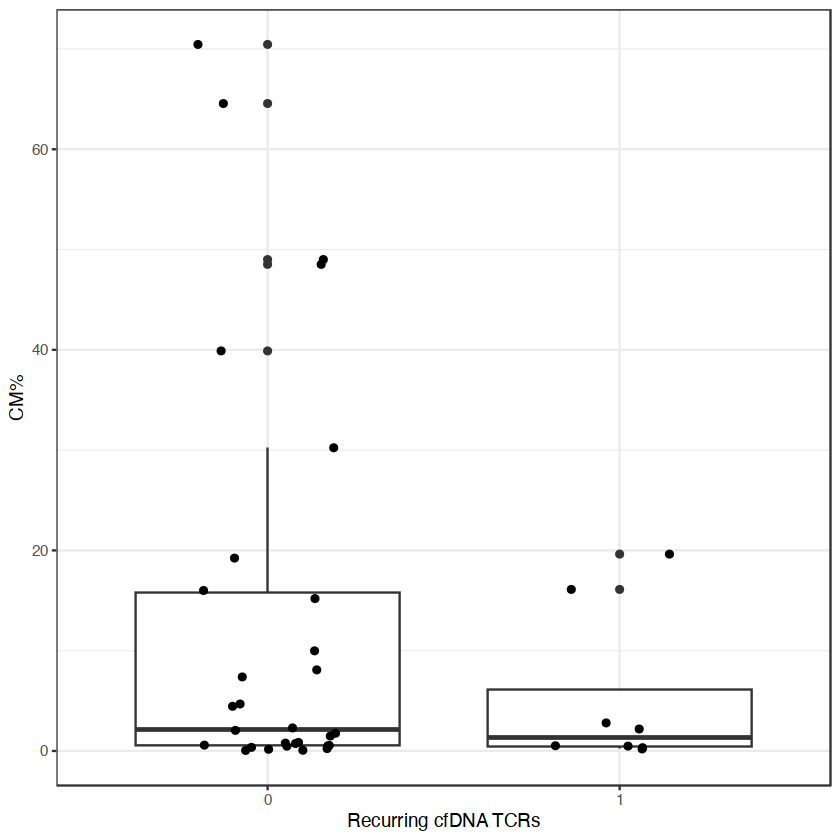

In [138]:
ggplot(leu, aes(x = grp, y = `CM%`)) +
    geom_boxplot() +
    geom_jitter(width = 0.2) +
    theme_bw() +
    labs(x = "Recurring cfDNA TCRs", y = "CM%") 

# Clonetrack

## T-ALL

#### 387

In [ ]:
tall <- meta_div[ meta_div$Disease_type == "T-ALL",]

In [ ]:
table(tall$Patient)

In [ ]:
CHP_387 <- tall$file[ tall$Patient == "CHP_387"]

In [ ]:
cdr3df <- cdr3_dataframe.fx(paste0(h4hpath,"NextSeq/"), "TRB", CHP_387, "inframe")

In [ ]:
cdr3df_pt <- order_cdr3df.fx(cdr3df)

In [ ]:
colnames(cdr3df_pt)

In [ ]:
table(cdr3df_pt$cycle)

In [ ]:
head(cdr3df_pt[, c("samplename", "samplelabel")])

In [ ]:
p387 <- plot_clonetracks.fx(cdr3df_pt, plotpath, "TRB", "cloneFraction", 0, "T-ALL", 222)

In [ ]:
p387

In [ ]:
trb_p <- trbpointplot.fx(metadta = meta_div, pat = "CHP_387")

In [ ]:
trb_p

In [ ]:
pdf(paste0(plotpath, "Clonetrack_CHP_387_TRB.pdf"), width = 6, height = 10)
cowplot::plot_grid(trb_p,
    p387 + theme(plot.title = element_blank()),
    ncol = 1, align = "v", rel_heights = c(0.3, 1)
)
dev.off()


#### others

In [ ]:
table(tall$Patient)

In [ ]:
pat <- "CHP_324"

CHP_pat <- tall$file[tall$Patient == pat]

cdr3df <- cdr3_dataframe.fx(paste0(h4hpath, "NextSeq/"), "TRB", CHP_pat, "inframe")

cdr3df_pt <- order_cdr3df.fx(cdr3df)

myclonetrack <- plot_clonetracks.fx(cdr3df_pt, plotpath, "TRB", "cloneFraction", 0, "T-ALL", 222)

trb_p <- trbpointplot.fx(metadta = meta_div, pat = pat)

pdf(paste0(plotpath, "Clonetrack_", pat, "_TRB.pdf"), width = 6, height = 10)
cowplot::plot_grid(trb_p,
    myclonetrack + theme(plot.title = element_blank()),
    ncol = 1, align = "v", rel_heights = c(0.3, 1)
)
dev.off()


## Solid tumors

In [ ]:
morethanone

In [ ]:
meta_div[ grepl("FFPE", meta_div$basename), c("Patient", "Disease_type") ]

In [ ]:
myclonetrack

In [ ]:
for (p in rownames(morethanone)) {
    message(p)
    pat <- p
    disease <- meta_div[meta_div$Patient == pat, "Disease_type"][1]

    CHP_pat <- meta_div$file[meta_div$Patient == pat]

    cdr3df <- cdr3_dataframe.fx(paste0(h4hpath, "NextSeq/"), "TRB", CHP_pat, "inframe")

    cdr3df_pt <- order_cdr3df.fx(cdr3df)

    myclonetrack <- plot_clonetracks.fx(cdr3df_pt, plotpath, "TRB", "cloneFraction", 0, disease, 222)

    trb_p <- trbpointplot.fx(metadta = meta_div, pat = pat)

    pdf(paste0(plotpath, "Clonetrack_", pat,"_", disease, "_TRB.pdf"), width = 6, height = 10)
    print(cowplot::plot_grid(trb_p,
        myclonetrack + theme(plot.title = element_blank()),
        ncol = 1, align = "v", rel_heights = c(0.3, 1) )
    )
    dev.off()
    
    rm(cdr3df, cdr3df_pt, myclonetrack, trb_p)
}


In [ ]:
# pat <- "CHP_418"
# disease <- "NBL"

# CHP_pat <- meta_div$file[meta_div$Patient == pat]

# cdr3df <- cdr3_dataframe.fx(paste0(h4hpath, "NextSeq/"), "TRB", CHP_pat, "inframe")

# cdr3df_pt <- order_cdr3df.fx(cdr3df)

# myclonetrack <- plot_clonetracks.fx(cdr3df_pt, plotpath, "TRB", "cloneFraction", 0, disease, 222)
# myclonetrack

# trb_p <- trbpointplot.fx(metadta = meta_div, pat = pat)

# pdf(paste0(plotpath, "Clonetrack_", pat, "_TRB.pdf"), width = 6, height = 10)
# cowplot::plot_grid(trb_p,
#     myclonetrack + theme(plot.title = element_blank()),
#     ncol = 1, align = "v", rel_heights = c(0.3, 1)
# )
# dev.off()


In [ ]:
# cairo_pdf(paste0(plotpath, "CHP_364_OS_FFPE_PBMC_TRB.pdf"), width = 10, height = 15)
# p387 + theme(axis.title.x = element_text(size = 15) ) + labs(y = "TCR\U03B2 clone fraction", x = "Sample prior to chemotherapy cycle") + 
# scale_x_discrete(labels = c("Tumor", "Pre-cycle 1", "Pre-cycle 2", "Pre-cycle 3"))
# dev.off()

In [1]:
ls()

character(0)

# CSF

In [ ]:
myfle <- list.files( "~/Desktop/H4H/pughlab/pediatric/projects/TCR_HSJ/NextSeq/", recursive = T, pattern = "CLONES_TRA", full.names = TRUE)

In [ ]:
myfle <- myfle[! grepl("20000", myfle) ]

In [ ]:
myfle

In [ ]:
mycase <- "67" #  51 TRB no clones

In [ ]:
HSJ <- myfle[ grepl(mycase, myfle) ]

In [ ]:
HSJ

In [ ]:
cdr3df <- cdr3_dataframe.fx("", "TRA", HSJ, "inframe")

In [ ]:
table(cdr3df$samplename)

In [ ]:
cdr3df$samplename[ cdr3df$samplename == "67-CSF"] <- "CSF"
#cdr3df$samplename[ cdr3df$samplename == "77-Plasma"] <- "Plasma"
cdr3df$samplename[ cdr3df$samplename == "67-Tum"] <- "Tumor"

In [ ]:
cdr3df$samplename <- factor(cdr3df$samplename, levels = c("Tumor", "CSF"))

In [ ]:
p <- plot_clonetracks.fx(cdr3df, plotpath, "TRA", "cloneFraction", 0, "HSJ67", 222)
p

In [ ]:
cairo_pdf(paste0(plotpath, "HSJ_67_Tum_CSF_TRA.pdf"), width = 10, height = 15)
p + theme(axis.title.x = element_text(size = 15) ) + labs(y = "TCR\U03B1 clone fraction", x = "", title = "")
dev.off()